# Docking scores and pKi correlations

In [1]:
import pandas as pd
import numpy as np

#### Experimental data

In [2]:
df_erk2_ligs_exp = pd.read_json('ERK2_molecules_used_by_Fourches_SMILES.json')
df_erk2_ligs_exp = df_erk2_ligs_exp.set_index('Name')
# Create a 'model' or 'csar' label as Fourches & Ash do
df_erk2_ligs_exp['dataset'] = ['csar' if 'CSAR' in i else 'model' for i in df_erk2_ligs_exp.index]
df_erk2_ligs_exp.head()

,pKi,smiles,activity,activity_label,dataset
Name,,,,,
CSAR_erk2_18,9.00,OC[C@@H](NC(=O)c1[nH]cc(c1)-c1nc(ncc1C)NC(C)C)...,1,active,csar
CSAR_erk2_20,8.70,Clc1cc(ccc1)[C@H](NC(=O)c1[nH]cc(c1)-c1nc(ncc1...,1,active,csar
CSAR_erk2_17,8.52,Clc1cc(ccc1)[C@H](NC(=O)c1[nH]cc(c1)-c1nc(ncc1...,1,active,csar
CSAR_erk2_16,8.40,Clc1cc(ccc1)[C@H](NC(=O)c1[nH]cc(c1)-c1nc(ncc1...,1,active,csar
CSAR_erk2_15,8.40,OC[C@@H](NC(=O)c1[nH]cc(c1)-c1nc(ncc1C)NCC)c1c...,1,active,csar


#### Docking results

In [3]:
# Load docking results with Vinardo
vinardo_dk_results = pd.read_csv('./docking_results/vinardo_erk2_86mols_vs_166prots.csv', index_col=0)
# Order the row to match the order of the df_erk2_ligs_exp data frame
vinardo_dk_results = vinardo_dk_results.reindex(df_erk2_ligs_exp.index)

In [4]:
# Load docking results with Vina
vina_dk_results = pd.read_csv('./docking_results/vina_erk2_86mols_vs_166prots.csv', index_col=0)
# Order the row to match the order of the df_erk2_ligs_exp data frame
vina_dk_results = vina_dk_results.reindex(df_erk2_ligs_exp.index)

## Spearman correlation values

### First, compare using only the 3i60 conformation

In [5]:
from scipy.stats import spearmanr

##### Results with Vina

In [6]:
# For model dataset
print('Spearman corr. between pKi values and VINA results:')

model_mask = df_erk2_ligs_exp.dataset == 'model'
rs_ = spearmanr(df_erk2_ligs_exp[model_mask].pKi, - vina_dk_results.loc[model_mask, :]['3i60'])
print('Model dataset (47 mols.):\n',
      '\trho:', round(rs_[0], 4), '\t', 'p:', round(rs_[1], 4))

# For csar dataset
csar_mask = df_erk2_ligs_exp.dataset == 'csar'
rs_ = spearmanr(df_erk2_ligs_exp[csar_mask].pKi, - vina_dk_results.loc[csar_mask, :]['3i60'])
print('CSAR dataset (39 mols.):\n',
      '\trho:', round(rs_[0], 4), '\t', 'p:', round(rs_[1], 4))

# For csar dataset
rs_ = spearmanr(df_erk2_ligs_exp.pKi, - vina_dk_results['3i60'])
print('All molecules (86):\n',
      '\trho:', round(rs_[0], 4), '\t', 'p:', round(rs_[1], 4))

Spearman corr. between pKi values and VINA results:
Model dataset (47 mols.):
 	rho: 0.4415 	 p: 0.0019
CSAR dataset (39 mols.):
 	rho: 0.4975 	 p: 0.0013
All molecules (86):
 	rho: 0.4722 	 p: 0.0


##### Results with Vinardo

In [7]:
# For model dataset
print('Spearman corr. between pKi values and VINA results:')

model_mask = df_erk2_ligs_exp.dataset == 'model'
rs_ = spearmanr(df_erk2_ligs_exp[model_mask].pKi, - vinardo_dk_results.loc[model_mask, :]['3i60'])
print('Model dataset (47 mols.):\n',
      '\trho:', round(rs_[0], 4), '\t', 'p:', round(rs_[1], 4))

# For csar dataset
csar_mask = df_erk2_ligs_exp.dataset == 'csar'
rs_ = spearmanr(df_erk2_ligs_exp[csar_mask].pKi, - vinardo_dk_results.loc[csar_mask, :]['3i60'])
print('CSAR dataset (39 mols.):\n',
      '\trho:', round(rs_[0], 4), '\t', 'p:', round(rs_[1], 4))

# For csar dataset
rs_ = spearmanr(df_erk2_ligs_exp.pKi, - vinardo_dk_results['3i60'])
print('All molecules (86):\n',
      '\trho:', round(rs_[0], 4), '\t', 'p:', round(rs_[1], 4))

Spearman corr. between pKi values and VINA results:
Model dataset (47 mols.):
 	rho: 0.6786 	 p: 0.0
CSAR dataset (39 mols.):
 	rho: 0.5752 	 p: 0.0001
All molecules (86):
 	rho: 0.6297 	 p: 0.0


#### Conclusion:
Fourches & Ash used Glide SP (standard precision) and Glide XP (extra precision), and their results were the following:
> Model set:
- Glide SP: $\rho=0.74$
- Glide XP: $\rho=0.65$

> CSAR set:
- Glide SP: $\rho=0.43$
- Glide XP: $\rho=0.51$

1. **Vina got worse results than Vinardo and than Glide** (with exception of Glide SP in CSAR dataset).
2. **Results with Vinardo outperforms Glide results** (with exception of Glide SP in Model dataset).

### Reproducing the Fig 2

In [80]:
from plotnine import *
import plotnine

In [123]:
# Create the dataframe
df = pd.DataFrame({'pKi': df_erk2_ligs_exp.pKi, 'dataset': df_erk2_ligs_exp.dataset,
                   'Vinardo': vinardo_dk_results['3i60'], 'Vina': vina_dk_results['3i60']})

melted_df = pd.melt(df, id_vars ='dataset', value_vars=['Vinardo', 'Vina', 'pKi'])
melted_df['variable'] = pd.Categorical(melted_df['variable'], categories=['pKi', 'Vina', 'Vinardo'])

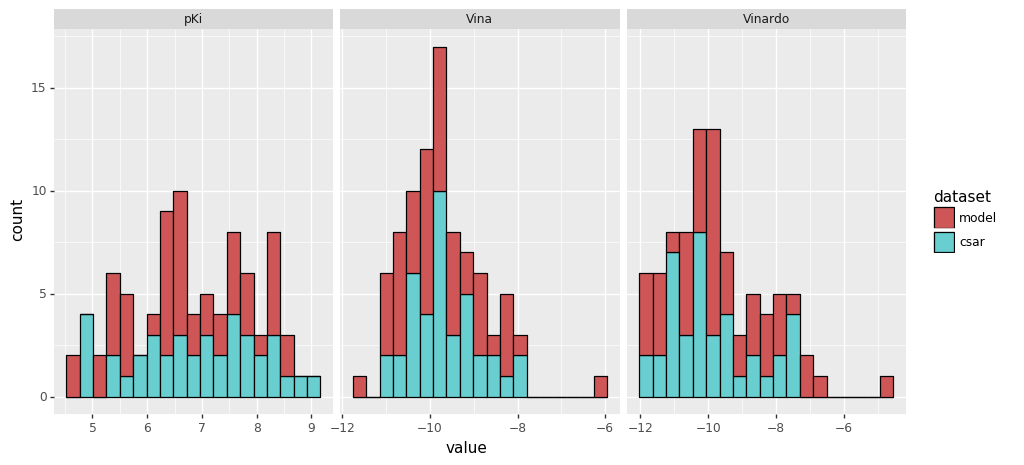

<ggplot: (8749662828473)>


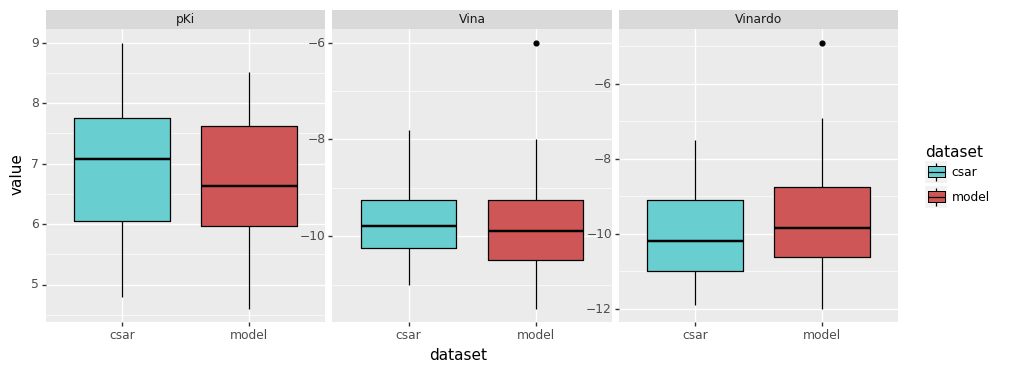

<ggplot: (8749662859689)>


In [124]:
plotnine.options.figure_size = (11, 5)
melted_df['dataset'] = pd.Categorical(melted_df['dataset'], categories = ['model', 'csar'])
print(
ggplot(melted_df, aes(x='value', fill='dataset')) + 
     geom_histogram(bins=19, position="stack", color='black') + 
     facet_wrap('~variable', scales = "free_x") + 
     scale_fill_manual(values=("#cf5656", "#68cecf"))
)

melted_df['dataset'] = pd.Categorical(melted_df['dataset'], categories = ['csar', 'model'])
plotnine.options.figure_size = (11, 3.8)
print(
ggplot(melted_df, aes(x='dataset', y='value', fill='dataset')) + 
     geom_boxplot(color='black') + 
     facet_wrap('~variable', scales = "free_y") + 
     scale_fill_manual(values=("#68cecf", "#cf5656"))
)

## All protein conformations

### Spearman correlation for all protein crystal conformations

In [8]:
calc_spear_cor = lambda x: spearmanr(df_erk2_ligs_exp.pKi, - x)[0]

# Vinardo results
vinardo_spear_corr = vinardo_dk_results.apply(calc_spear_cor, axis=0)

# Vina results
vina_spear_corr = vina_dk_results.apply(calc_spear_cor, axis=0)

#### Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='white', palette='Set3')

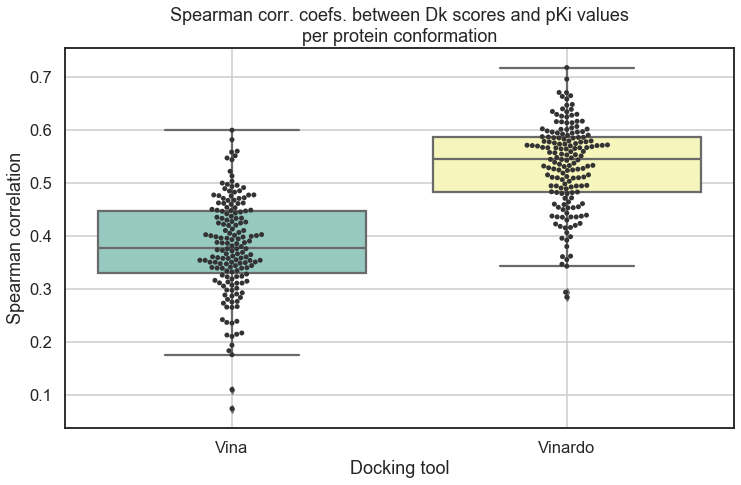

Each point belongs to a protein crystal conformation.


In [10]:
df_ = pd.DataFrame([vina_spear_corr, vinardo_spear_corr], index=['Vina', 'Vinardo']).T
df_melted = df_.melt(var_name='Docking tool', value_name='Spearman correlation')

figure, ax = plt.subplots(figsize=(12, 7))
ax = sns.boxplot(y='Spearman correlation', x='Docking tool', data=df_melted)
ax = sns.swarmplot(y='Spearman correlation', x='Docking tool', data=df_melted, color='.2')
ax.set_title('Spearman corr. coefs. between Dk scores and pKi values\nper protein conformation')
plt.grid()
plt.show()
print('Each point belongs to a protein crystal conformation.')

# Paired test between two correlation sets

In [11]:
import scipy.stats as stats

### Normal distribution
**Null hypothesis:**
   - $H_0$: Sample $i$ follows a normal distribution.

In [12]:
print('Normality (Shapiro-Wilks test):')

norm_t = stats.shapiro(vina_spear_corr)
print(F'\t Vina:\t W = {round(norm_t[0], 3)}  p = {round(norm_t[1], 5)}; Ho accepted (alpha = 0.05).')

norm_t = stats.shapiro(vinardo_spear_corr)
print(F'\t Vrdo:\t W = {round(norm_t[0], 3)}  p = {round(norm_t[1], 5)}; Ho rejected (alpha = 0.05).')

Normality (Shapiro-Wilks test):
	 Vina:	 W = 0.989  p = 0.22515; Ho accepted (alpha = 0.05).
	 Vrdo:	 W = 0.975  p = 0.00485; Ho rejected (alpha = 0.05).


### Homocedasticity
**Null hypothesis:**
   - $H_0$: All samples have the same variance $\Longrightarrow \sigma_1 = \sigma_2$

In [13]:
print('Homocedasticity (Barlet test):') # We assume normality
bar_t = stats.bartlett(*[vina_spear_corr, vinardo_spear_corr])
print(F'\t W = {round(bar_t[0], 3)}  p = {round(bar_t[1], 5)}; Ho accepted (alpha = 0.05): Samples are homocedastic.')

print('Homocedasticity (Levene test):')
lev_t = stats.levene(*[vina_spear_corr, vinardo_spear_corr],  center="mean")
print(F'\t W = {round(lev_t[0], 3)}  p = {round(lev_t[1], 5)}; Ho accepted (alpha = 0.05): Samples are homocedastic.')

Homocedasticity (Barlet test):
	 W = 1.854  p = 0.17331; Ho accepted (alpha = 0.05): Samples are homocedastic.
Homocedasticity (Levene test):
	 W = 0.95  p = 0.33031; Ho accepted (alpha = 0.05): Samples are homocedastic.


### Paired-samples comparison
#### t-paired test and Wilcoxon signed-rank test:

**Null hypothesis:**
   - $H_0$: The means of the samples are equal $\Longrightarrow \mu_{vrd} = \mu_{vin}$
       - Non-parametric: Samples come from the same  population.
   - $H_a$: The mean of Vinardo is greater than the mean of Vina $\Longrightarrow \mu_{vrd} > \mu_{vin}$ 
       - Non-parametric: Samples come from different populations

In [14]:
print('t-paired test (to compare means of related samples):')
t_test = stats.ttest_rel(vina_spear_corr, vinardo_spear_corr)
print(F'\t t = {round(t_test[0], 3)}  p = {round(t_test[1], 5)}; Ho rejected (alpha = 0.05): The means of the samples are different.')
print('\n')
print('Wilcoxon test (to compare two related samples\n[Ho: samples comes from the same population]):')
wix_test = stats.wilcoxon(vina_spear_corr, vinardo_spear_corr, alternative="greater")
print(F'\t statistic = {round(wix_test[0], 3)}  p = {round(wix_test[1], 5)}; Ho rejected (alpha = 0.05): Vinardo is greater.')

t-paired test (to compare means of related samples):
	 t = -20.291  p = 0.0; Ho rejected (alpha = 0.05): The means of the samples are different.


Wilcoxon test (to compare two related samples
[Ho: samples comes from the same population]):
	 statistic = 292.0  p = 1.0; Ho rejected (alpha = 0.05): Vinardo is greater.


### Scatter plot between correlation values in Vina and Vinardo

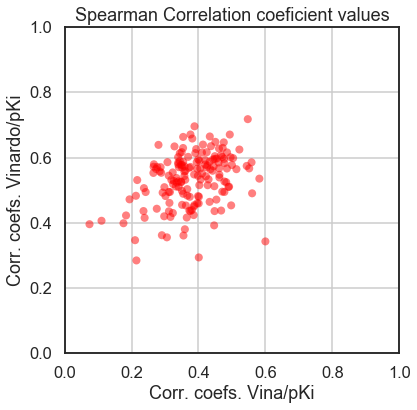

In [15]:
figure, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(x='Vina', y='Vinardo', data=df_, color='red', edgecolor='none', alpha=0.5, s=65)
ax.set_xlabel('Corr. coefs. Vina/pKi')
ax.set_ylabel('Corr. coefs. Vinardo/pKi')
ax.set_title('Spearman Correlation coeficient values')
plt.xlim((0,1)); plt.ylim((0,1))
plt.grid()
plt.show()

#### Let's recreate figure 2 from Ash & Fourches

# Feature selection:
**Selecting molecular descriptors following the Ash & Fourches (2017) procedure** (it is assumed that these steps were made independently for each set of descriptors):
1. **Low variance filter:** Features in the lower variance quartile were discarded.
2. **Correlation filters:** For any pair of descriptors with $|r| > 0.9$ the descriptor with largest mean of $|r|$ was removed.

#### Additionaly they did the following analysis (not necessarily to drop features):
1. **Pearson (?) correlation between each descriptor and pKi values.**  
2. **Paired t-test between active and inactive ligands using each set of descriptors.**